In [1]:
import pandas as pd
import numpy as np
import os
# os.getcwd()
# food_data = pd.read_stata("2019_20//GSEC6b.dta")


In [ ]:
food_data.columns

## Dependent Variable

#### Unit work

In [ ]:
count = food_data['untcd'].value_counts()
df_count = pd.DataFrame({"Unit":count.index, "Count": count.values})
df_count[["Unit Index", "Unit Name", "Others"]] = df_count['Unit'].str.split(".", expand=True)
# df_count["Unit Name"] = df_count["Unit Name"] + df_count["Others"]
df_count['Count']

In [ ]:
kgdata = food_data.query("untcd == '1. Kilogram (kg)'")
len(set(kgdata['itmcd']))

In [ ]:
len(set(food_data['itmcd']))

### Get the food items of 2019

In [3]:
fi = food_data['coicop_3'].drop_duplicates()
fi.values[1]

'       Food Products n.e.c.    '

In [ ]:
# food_data['coicop_3'].drop_duplicates

In [5]:
specific_itms = food_data.query("coicop_3 == '       Beer    '")
si = specific_itms['itmcd'].drop_duplicates()
df_count = pd.DataFrame({"Count": si.values})

# specific_itms

In [41]:
food_data_code = pd.read_stata("2019_20//GSEC6b.dta",convert_categoricals=False)
FCSStap = [116,111,114,113,110,1151,112,1721,172,1734,1082,105,107,1081,109,106,1084,173,1735]
FCSPulse = [1461,1462,162,141,140,145,1762,1761,144,163,142,143]
FCSSugar = [1731,1733,1732,147,1253,1471,1083]
FCSCond = [152,1351,1352,1391,1504,1353,153,154,1491,1492,1482]
FCSFat = [1271,1272,1291,129,1273,128]
FCSVeg = [138,136,139,135,1652,168,1651,165,137,164,1654,1653,177,167]      
FCSFruit = [103,171,101,1473,102,1741,166,170,1311,133,1312,169,1313,132,130,174,134,1041,1042]
FCSPr = [124,1237,1235,1236,1234,1221,1231,1232,1222,1181,117,119,1201,1214,1172,120,1182,1192,1191,1212,1211,1213,1171,1215,1173,1193,1174]
FCSDairy = [125,1252,1254,1251,126]
FCS_Code = ['FCSStap','FCSPulse','FCSSugar','FCSCond','FCSFat','FCSVeg','FCSFruit','FCSPr','FCSDairy']
food_data_code['FCSCode'] = food_data_code['itmcd'].replace(to_replace=FCSStap,value="FCSStap")
food_data_code['FCSCode'].replace(to_replace=FCSPulse,value="FCSPulse",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSSugar,value="FCSSugar",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSCond,value="FCSCond",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSFat,value="FCSFat",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSVeg,value="FCSVeg",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSFruit,value="FCSFruit",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSPr,value="FCSPr",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSDairy,value="FCSDairy",inplace=True)

### FCS 2019

In [42]:
food_data_code = pd.read_stata("2019_20//GSEC6b.dta",convert_categoricals=False)
FCSStap = [116,111,114,113,110,1151,112,1721,172,1734,1082,105,107,1081,109,106,1084,173,1735]
FCSPulse = [1461,1462,162,141,140,145,1762,1761,144,163,142,143]
FCSSugar = [1731,1733,1732,147,1253,1471,1083]
FCSCond = [152,1351,1352,1391,1504,1353,153,154,1491,1492,1482]
FCSFat = [1271,1272,1291,129,1273,128]
FCSVeg = [138,136,139,135,1652,168,1651,165,137,164,1654,1653,177,167]      
FCSFruit = [103,171,101,1473,102,1741,166,170,1311,133,1312,169,1313,132,130,174,134,1041,1042]
FCSPr = [124,1237,1235,1236,1234,1221,1231,1232,1222,1181,117,119,1201,1214,1172,120,1182,1192,1191,1212,1211,1213,1171,1215,1173,1193,1174]
FCSDairy = [125,1252,1254,1251,126]
FCS_Code = ['FCSStap','FCSPulse','FCSSugar','FCSCond','FCSFat','FCSVeg','FCSFruit','FCSPr','FCSDairy']
food_data_code['FCSCode'] = food_data_code['itmcd'].replace(to_replace=FCSStap,value="FCSStap")
food_data_code['FCSCode'].replace(to_replace=FCSPulse,value="FCSPulse",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSSugar,value="FCSSugar",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSCond,value="FCSCond",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSFat,value="FCSFat",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSVeg,value="FCSVeg",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSFruit,value="FCSFruit",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSPr,value="FCSPr",inplace=True)
food_data_code['FCSCode'].replace(to_replace=FCSDairy,value="FCSDairy",inplace=True)
food_data_wk = food_data_code.query("FCSCode in @FCS_Code").copy()
# data cleaning 
food_data_wk.dropna(subset=['CEB04'], inplace=True) # drop the days of consumption are nan 
din = food_data_wk[food_data_wk['CEB04'] >7].index # drop those consume more than 7 days 
food_data_wk.drop(index=din,inplace=True)
b1 = food_data_wk['CEB06'].isna().values
b2 = food_data_wk['CEB10'].isna().values
b3 = food_data_wk['CEB12'].isna().values
b0 = food_data_wk['CEB12']==0
# drop for all nan consumption volumn data, also drop nan for 06 and 10, and 0 for 12

## case 1: take invalid answer as wrong, and drop them
drop1 = food_data_wk.loc[b1*b2*b0,:].index
drop2 = food_data_wk.loc[b1*b2*b3,:].index
food_data_wk.drop(index=drop1,inplace=True)
food_data_wk.drop(index=drop2,inplace=True)
## case2: keep those "invalid" answers

hhid = list(set(food_data_wk["hhid"]))
hhid.sort()

In [5]:
HHFCS = pd.DataFrame({"hhid":hhid, "FCS":np.nan,"Stap":np.nan,"Pulse":np.nan,"Sugar":np.nan,"Cond":np.nan,"Fat":np.nan,"Veg":np.nan,"Fruit":np.nan,"Meat":np.nan,"Dairy":np.nan})
# FCS_Code

In [7]:
for i in hhid:
    wkcp = food_data_wk[food_data_wk["hhid"] == i].copy()
    FCSls = []
    for j in FCS_Code: 
        inter = wkcp[wkcp["FCSCode"] == j]['CEB04'].sum()
        FCSls.append(inter)
    FCSarray = np.nan_to_num(np.array(FCSls))
    FCSarray_clip = np.clip(FCSarray,None,7) #substitute the number bigger than 7 to 7 
    score = FCSarray_clip[0]*2 + FCSarray_clip[1]*3 + FCSarray_clip[2]*0.5 + FCSarray_clip[3]*0 + FCSarray_clip[4]*0.5 + FCSarray_clip[5] + FCSarray_clip[6] + FCSarray_clip[7]*4 + FCSarray_clip[8]*4
    HHFCS.loc[HHFCS['hhid'] == i,"FCS"] = score
    HHFCS.loc[HHFCS['hhid'] == i,"Stap"] = FCSarray_clip[0]
    HHFCS.loc[HHFCS['hhid'] == i,"Pulse"] = FCSarray_clip[1]
    HHFCS.loc[HHFCS['hhid'] == i,"Sugar"] = FCSarray_clip[2]
    HHFCS.loc[HHFCS['hhid'] == i,"Cond"] = FCSarray_clip[3]
    HHFCS.loc[HHFCS['hhid'] == i,"Fat"] = FCSarray_clip[4]
    HHFCS.loc[HHFCS['hhid'] == i,"Veg"] = FCSarray_clip[5]
    HHFCS.loc[HHFCS['hhid'] == i,"Fruit"] = FCSarray_clip[6]
    HHFCS.loc[HHFCS['hhid'] == i,"Meat"] = FCSarray_clip[7]
    HHFCS.loc[HHFCS['hhid'] == i,"Dairy"] = FCSarray_clip[8]

<AxesSubplot:>

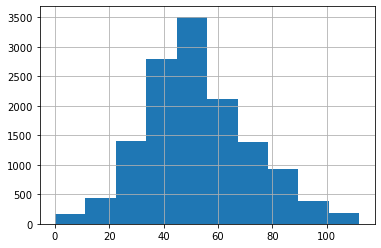

In [8]:
HHFCS["FCS"].hist()

In [9]:
HHFCS["FCS"].describe()

count    13302.000000
mean        52.434318
std         19.519590
min          0.000000
25%         39.500000
50%         50.000000
75%         64.000000
max        112.000000
Name: FCS, dtype: float64

In [10]:
HHFCS.to_csv("2019_20//FCS.csv",index=False)

In [11]:
FCS_Plot = HHFCS.groupby('FCS').mean()
FCS_Plot.reset_index(inplace=True)
newcols = ['Stap','Veg','Dairy','Meat','Pulse','Fruit','Sugar','Fat']
import plotly.express as px
# HHFCS_cum_long2 = pd.melt(HHFCS, id_vars=["hhid",'FCS'],value_vars=val_var,var_name="sub_FCS")
fig = px.area(FCS_Plot, x="FCS", y=newcols)
fig.update_layout(width=1000, 
    height=600, xaxis_title="FCS",
    yaxis_title="cumulative mean consumption frequency",title = "Uganda FCS 2019/20")
fig.add_vline(x=21,line_width=2, line_dash="dash", line_color="green")
fig.add_vline(x=28,line_width=2, line_dash="dash", line_color="blue")
fig.add_vline(x=35,line_width=2, line_dash="dash", line_color="red")
fig.show()
fig.write_image("FCS_decompo19.png")


In [94]:
fig = px.histogram(HHFCS,x="FCS",opacity=0.8)
fig.update_layout(width=800, 
    height=500, xaxis_title="FCS",
    yaxis_title="FCS Frequency",title = "Uganda FCS 2019/20")
fig.add_vline(x=21,line_width=2, line_dash="dash", line_color="green")
fig.add_vline(x=28,line_width=2, line_dash="dash", line_color="blue")
fig.add_vline(x=35,line_width=2, line_dash="dash", line_color="red")
fig.write_image("FCS_freq19.png")
fig.show()

In [101]:
HHFCS.query("FCS <=21 and FCS >0").shape[0]/HHFCS.shape[0]

0.039918809201623814

### FCS 2016

In [12]:
food_data_code_16 = pd.read_stata("2016_17//GSEC6b.dta",convert_categoricals=False)
food_data_code_16_str = pd.read_stata("2016_17//GSEC6b.dta")

In [13]:
# check coding rule 
food_data_code_16["new"] = food_data_code_16_str["itmcd"]
codingRule2016 = food_data_code_16[['itmcd', 'new']].copy()
codingRule2016.drop_duplicates(inplace=True)

In [14]:
FCSStap = [1131,1101,109,107,1051,114,173,1151,1735,1721,1121,1132,1082,1122,1111,1061,172,1734,1052,116,1112,1102,1063,1081,1062]
FCSPulse = [141,144,163,140,1462,162,145,1461,143,1761,142,1762]
FCSSugar = [147,1732,1253,1733,1083,1731,1471,1472]
FCSCond = [150,1491,1351,151,1352,1481,152,1353,1492]
FCSFat = [1271,1272,128,129,1291]
FCSVeg = [1372,135,136,167,164,138,168,1653,1652,165,1371,1654,139,1651]   
FCSFruit = [103,166,101,132,102,170,133,1311,1312,174,130,171,169,1313,1741,134]
FCSPr = [117,1211,1221,1192,1236,1231,1214,1241,1242,1237,1212,1222,1232,1171,1213,119,1172,1234,1193,1215,120,1201,1235,1191,1243]
FCSDairy = [125,1251,126,1252,1254,1281]

In [15]:
food_data_code_16['FCSCode'] = food_data_code_16['itmcd'].replace(to_replace=FCSStap,value="FCSStap")
food_data_code_16['FCSCode'].replace(to_replace=FCSPulse,value="FCSPulse",inplace=True)
food_data_code_16['FCSCode'].replace(to_replace=FCSSugar,value="FCSSugar",inplace=True)
food_data_code_16['FCSCode'].replace(to_replace=FCSCond,value="FCSCond",inplace=True)
food_data_code_16['FCSCode'].replace(to_replace=FCSFat,value="FCSFat",inplace=True)
food_data_code_16['FCSCode'].replace(to_replace=FCSVeg,value="FCSVeg",inplace=True)
food_data_code_16['FCSCode'].replace(to_replace=FCSFruit,value="FCSFruit",inplace=True)
food_data_code_16['FCSCode'].replace(to_replace=FCSPr,value="FCSPr",inplace=True)
food_data_code_16['FCSCode'].replace(to_replace=FCSDairy,value="FCSDairy",inplace=True)

In [16]:
food_data_wk = food_data_code_16.query("FCSCode in @FCS_Code").copy()
# data cleaning 
food_data_wk.dropna(subset=['ceb03b'], inplace=True) # drop the days of consumption are nan 
b1 = food_data_wk['ceb04'].isna().values
b2 = food_data_wk['ceb06'].isna().values
b3 = food_data_wk['ceb10'].isna().values
b4 = food_data_wk['ceb08'].isna().values
# drop for all nan consumption volumn data, also drop nan for 06 and 10, and 0 for 12

## case 1: take invalid answer as wrong, and drop them
drop2 = food_data_wk.loc[b1*b2*b3*b4,:].index
food_data_wk.drop(index=drop2,inplace=True)
## case2: keep those "invalid" answers

hhid = list(set(food_data_wk["hhid"]))
hhid.sort()

In [17]:
HHFCS16 = pd.DataFrame({"hhid":hhid, "FCS":np.nan,"Stap":np.nan,"Pulse":np.nan,"Sugar":np.nan,"Cond":np.nan,"Fat":np.nan,"Veg":np.nan,"Fruit":np.nan,"Meat":np.nan,"Dairy":np.nan})
for i in hhid:
    wkcp = food_data_wk[food_data_wk["hhid"] == i].copy()
    FCSls = []
    for j in FCS_Code: 
        inter = wkcp[wkcp["FCSCode"] == j]['ceb03b'].sum()
        FCSls.append(inter)
    FCSarray = np.nan_to_num(np.array(FCSls))
    FCSarray_clip = np.clip(FCSarray,None,7)
    score = FCSarray_clip[0]*2 + FCSarray_clip[1]*3 + FCSarray_clip[2]*0.5 + FCSarray_clip[3]*0 + FCSarray_clip[4]*0.5 + FCSarray_clip[5] + FCSarray_clip[6] + FCSarray_clip[7]*4 + FCSarray_clip[8]*4
    HHFCS16.loc[HHFCS16['hhid'] == i,"FCS"] = score
    HHFCS16.loc[HHFCS16['hhid'] == i,"Stap"] = FCSarray_clip[0]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Pulse"] = FCSarray_clip[1]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Sugar"] = FCSarray_clip[2]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Cond"] = FCSarray_clip[3]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Fat"] = FCSarray_clip[4]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Veg"] = FCSarray_clip[5]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Fruit"] = FCSarray_clip[6]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Meat"] = FCSarray_clip[7]
    HHFCS16.loc[HHFCS16['hhid'] == i,"Dairy"] = FCSarray_clip[8]

<AxesSubplot:>

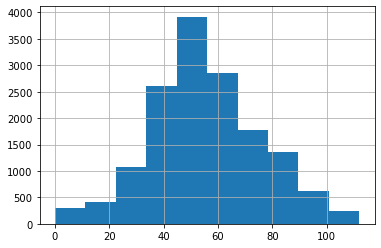

In [18]:
HHFCS16["FCS"].hist()

In [19]:
HHFCS16["FCS"].describe()

count    15144.000000
mean        55.407950
std         20.267476
min          0.000000
25%         43.000000
50%         53.500000
75%         68.500000
max        112.000000
Name: FCS, dtype: float64

In [20]:
HHFCS[HHFCS['FCS']<=21].shape[0]/HHFCS.shape[0]

0.04157269583521275

In [21]:
HHFCS16[HHFCS16['FCS']<=21].shape[0]/HHFCS16.shape[0]

0.04364764923402007

In [22]:
HHFCS16.to_csv("2016_17//FCS16.csv",index=False)

In [23]:
FCS_Plot = HHFCS16.groupby('FCS').mean()
FCS_Plot.reset_index(inplace=True)
newcols = ['Stap','Veg','Dairy','Meat','Pulse','Fruit','Sugar','Fat']
import plotly.express as px
fig = px.area(FCS_Plot, x="FCS", y=newcols)
fig.update_layout(width=1000, 
    height=600, xaxis_title="FCS",
    yaxis_title="cumulative mean consumption frequency",title = "Uganda FCS 2016/17")
fig.add_vline(x=21,line_width=2, line_dash="dash", line_color="green")
fig.add_vline(x=28,line_width=2, line_dash="dash", line_color="blue")
fig.add_vline(x=35,line_width=2, line_dash="dash", line_color="red")
fig.show()
fig.write_image("FCS_decompo16.png")


In [24]:
fig = px.histogram(HHFCS16,x="FCS",opacity=0.8)
fig.update_layout(width=800, 
    height=500, xaxis_title="FCS",
    yaxis_title="FCS Frequency",title = "Uganda FCS 2016/17")
fig.add_vline(x=21,line_width=2, line_dash="dash", line_color="green")
fig.add_vline(x=28,line_width=2, line_dash="dash", line_color="blue")
fig.add_vline(x=35,line_width=2, line_dash="dash", line_color="red")
fig.write_image("FCS_freq16.png")
fig.show()

### FCS Validation

In [26]:
HHFCS19 = pd.read_csv("2019_20//FCS.csv")
HHFCS16 = pd.read_csv("2016_17//FCS16.csv")
HHFCS19.drop(columns="Cond",inplace=True)
HHFCS16.drop(columns="Cond",inplace=True)

In [ ]:
# HHFCS19['FCS'] == 0 # should I drop those 0 FCS? 

In [48]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from sklearn.cluster import MeanShift
X = HHFCS19.iloc[:,2:].copy()
pca = PCA(4)
pcadata = pca.fit_transform(X=X)
# pca.fit(X)
# pca.explained_variance_ratio_
X_transformed = pcadata
# X_transformed[['hhid','FCS']] = HHFCS19[['hhid','FCS']]
# X_transformed
kmeans = KMeans(n_clusters=15, init = "k-means++",n_init=100,random_state=527).fit(X_transformed)
labels = kmeans.labels_

HHFCS19["Labels"] = labels
# HHFCS19
FCS19_mean = HHFCS19.iloc[:,1:].groupby("Labels").mean()
FCS19_count = HHFCS19.iloc[:,1:].groupby("Labels").count()
FCS19_mean["Prop. %"] = FCS19_count['FCS']/HHFCS19.shape[0]*100
FCS19_mean.sort_values(by="FCS",inplace=True)
FCS19_mean.round(1)

FCS  Stap  Pulse  Sugar  Fat  Veg  Fruit  Meat  Dairy  Prop. %
Labels                                                                 
2       25.7   6.0    0.9    0.3  0.4  5.4    0.3   1.1    0.2      8.2
7       39.7   6.8    1.7    0.6  5.7  6.8    0.5   2.2    0.4      7.2
8       39.9   6.0    1.2    6.4  0.9  5.5    1.1   2.2    1.3      3.8
11      40.3   6.5    6.3    0.3  0.3  4.7    0.9   0.5    0.1      7.4
9       42.4   5.0    2.0    0.6  0.8  5.6    5.6   1.9    1.7      2.9
10      47.5   6.8    5.9    0.8  5.4  6.8    0.8   1.2    0.1      6.8
1       47.9   5.4    6.7    0.3  0.3  5.5    6.3   0.5    0.8      7.1
3       50.3   6.8    1.4    6.7  6.5  6.9    0.7   3.7    0.9      7.0
6       53.1   6.5    6.2    6.4  2.1  6.5    1.7   1.9    0.4      6.9
14      56.4   6.7    5.7    6.7  6.3  6.9    1.2   2.4    0.4      9.2
4       58.8   6.1    5.5    1.0  5.7  6.9    6.3   2.1    1.3      4.8
12      62.3   5.9    5.6    6.6  1.0  6.4    6.5   1.6    2.6      5.7
0       64.3   6.4    6.2    6.8  6.0  7.0    6.1   2.2    1.1      9.4
13      65.2   6.3    2.5    6.8  6.3  7.0    4.8   4.0    2.8      7.3
5       89.3   6.6    4.3    6.9  6.4  7.0    6.8   4.3    6.5      6.1

In [52]:
px.area(HHFCS19.query("Labels == 2"), x="FCS", y=newcols)

In [ ]:
# FCS19_mean.round(1).to_csv("FCS2019_Kmeanscluster.csv",index=False)

In [50]:
X = HHFCS16.iloc[:,2:].copy()
pca = PCA(4)
pcadata = pca.fit_transform(X=X)
# pca.fit(X)
# pca.explained_variance_ratio_
X_transformed = pcadata
# X_transformed[['hhid','FCS']] = HHFCS16[['hhid','FCS']]
X_transformed
kmeans = KMeans(n_clusters=15, init = "k-means++",n_init=100,random_state=527).fit(X_transformed)
labels = kmeans.labels_
HHFCS16["Labels"] = labels
# HHFCS16
FCS16_mean = HHFCS16.iloc[:,1:].groupby("Labels").mean()
FCS16_count = HHFCS16.iloc[:,1:].groupby("Labels").count()
FCS16_mean["Prop. %"] = FCS16_count['FCS']/HHFCS16.shape[0]*100
FCS16_mean.sort_values(by="FCS",inplace=True)
FCS16_mean.round(1)

FCS  Stap  Pulse  Sugar  Fat  Veg  Fruit  Meat  Dairy  Prop. %
Labels                                                                 
7       22.6   5.1    0.7    0.3  0.2  3.6    0.6   1.1    0.4      6.9
10      38.0   5.7    1.1    0.8  1.0  5.1    6.4   1.9    0.8      3.5
13      41.7   6.6    6.4    0.5  0.3  4.8    0.9   0.5    0.3      7.2
9       42.1   6.8    1.4    0.9  4.2  6.7    0.8   3.4    0.1      5.1
0       42.8   6.1    1.5    5.2  1.1  4.8    0.9   1.6    2.7      4.9
12      48.5   6.1    6.4    0.6  0.6  5.9    6.4   0.7    0.3      6.1
6       49.9   6.8    5.8    1.1  4.1  6.7    1.1   2.0    0.1      7.3
3       53.2   6.7    2.5    6.6  6.1  6.9    1.1   3.9    0.5      8.2
5       53.3   6.8    6.1    6.6  4.1  6.7    1.3   1.6    0.4      9.9
14      57.3   6.7    5.3    1.2  4.8  6.9    6.5   2.7    0.2      5.9
2       62.9   6.7    2.1    6.1  6.0  7.0    6.4   4.8    1.1      5.7
8       64.7   6.7    6.0    6.7  5.6  7.0    6.3   2.7    0.7      9.5
1       70.2   6.3    5.9    5.0  1.4  6.5    6.3   1.3    4.7      6.3
11      78.4   6.8    4.2    6.9  5.6  6.8    1.8   2.9    6.5      5.1
4       88.8   6.8    4.2    6.9  5.9  6.9    6.7   3.9    6.7      8.5

In [51]:
px.area(HHFCS16.query("Labels == 7"), x="FCS", y=newcols)

In [ ]:
# a simpler way
def labfun(val):
    if val < 14:
        return "<14"
    elif val >= 14 and val <21:
        return "[14,21)"
    elif val >= 21 and val <28:
        return "[21,28)"
    elif val >= 28 and val <35:
        return "[28,35)"
    elif val >= 35 and val <42:
        return "[35,42)"
    elif val >= 49 and val <56:
        return "[49,56)"
    elif val >= 56 and val <63:
        return "[56,63)"
    else:
        return ">63"
    
HHFCS19["Labels"] = HHFCS19["FCS"].apply(labfun)
HHFCS19_condmean = HHFCS19.iloc[:,1:].groupby('Labels').mean()
HHFCS16["Labels"] = HHFCS16["FCS"].apply(labfun)
HHFCS16_condmean = HHFCS16.iloc[:,1:].groupby('Labels').mean()
HHFCS19_condmean.sort_values("FCS",inplace=True)
HHFCS16_condmean.sort_values("FCS",inplace=True)
HHFCS16_condmean.round(1)

In [ ]:
HHFCS19_condmean.round(1)

In [53]:
HHFCS19[HHFCS19['FCS']<=30].shape[0]/HHFCS19.shape[0]
# HHFCS16[HHFCS16['FCS']<=28].shape[0]/HHFCS16.shape[0]

0.11276499774470004

### FCS cross validate

In [105]:
HHFCS19 = pd.read_csv("2019_20//FCS.csv")
HHFCS16 = pd.read_csv("2016_17//FCS16.csv")
HHFCS19.drop(columns="Cond",inplace=True)
HHFCS16.drop(columns="Cond",inplace=True)
GSEC1 = pd.read_stata("2019_20//GSEC1.dta")

In [106]:
GSEC1_wk = GSEC1[["hhid",'region','poor_20','covid','year','month',"day",'dc_2018','s1aq2a',"urban"]].copy()
GSEC1_wk.dropna(inplace=True)
GSEC1_wk['hhid'] = GSEC1_wk['hhid'].astype('int64')

In [115]:
FCS19val = pd.merge(HHFCS19,GSEC1_wk,how='inner',on='hhid')
FCS19val_dropindex = FCS19val.query("FCS == 0").index
FCS19val.drop(index=FCS19val_dropindex,inplace=True) # drop those with 0 FCS, which makes no sense 

In [116]:
def FCSStaus(val):
    if val <=21:
        return "Poor"
    elif val>21 and val <=35:
        return "Borderline"
    else:
        return "Acceptable"
    
FCS19val['FCSStaus'] = FCS19val['FCS'].apply(FCSStaus)

In [117]:
import plotly.express as px

# Create a box plot using Plotly Express
fig = px.box(FCS19val,x="poor_20" , y='FCS',color="covid")
fig.update_layout(width=800, 
    height=600, xaxis_title="Poverity",
    yaxis_title="FCS",title = "Uganda FCS 2019/20")
fig.show()


In [118]:
fig = px.box(FCS19val,x="covid",y="FCS",color="FCSStaus")
fig.update_layout(width=500, 
    height=600)
fig.show()

In [119]:
FCS19val['Date'] = pd.to_datetime(FCS19val[['year', 'month','day']])

In [120]:
fig = px.box(FCS19val.query("FCSStaus == 'Poor'"),x="urban" , y='FCS',color="covid")
fig.update_layout(width=1000, 
    height=600)
fig.show()

In [61]:
# FCS19val[['urban','FCSStaus']]
# FCS19val['urban'].sum()/FCS19val.shape[0]
urban = FCS19val.query("urban == 1")['FCSStaus'].value_counts()
rural = FCS19val.query("urban == 0")['FCSStaus'].value_counts()
rural/rural.sum()

Acceptable    0.815246
Borderline    0.146690
Poor          0.038064
Name: FCSStaus, dtype: float64

In [62]:
urban/urban.sum()

Acceptable    0.850088
Borderline    0.104350
Poor          0.045561
Name: FCSStaus, dtype: float64

In [205]:
GSEC12 = pd.read_stata("2019_20//GSEC12.dta",convert_categoricals=False)
GSEC12_wk = GSEC12[['hhid','W12']].copy()
GSEC12_wk.dropna(inplace=True)
GSEC12_wk['hhid'] = GSEC12_wk['hhid'].astype('int64')
validate = pd.merge(HHFCS19,GSEC12_wk,on="hhid",how='inner')
# validate['Spstatus'] = np.nan

from scipy.stats.stats import pearsonr
from scipy import stats
res_sp = stats.spearmanr(validate['FCS'],validate['W12'])
res = pearsonr(validate['FCS'],validate['W12'])
res_sp

SpearmanrResult(correlation=0.23491212373162507, pvalue=5.027821963716127e-166)

In [122]:
vali19 = pd.merge(FCS19val,validate[['hhid','W12']],on='hhid',how='inner').copy() # here FCS != 0 

#### prop. in the food exp

In [123]:
from scipy.stats.stats import pearsonr
# here you need to regenerate food_data_wk for 19 and 16 separately 
food19wk = food_data_wk[['hhid','CEB07','CEB11','CEB13']].copy()
food19wk.fillna(0,inplace=True)
food19wk['TotalExpenditure'] = food19wk.iloc[:,1] + food19wk.iloc[:,2] + food19wk.iloc[:,3]
food19val = food19wk.groupby('hhid').sum().copy()
food19val.reset_index(inplace=True)
food19val['prop_given'] = food19val['CEB13']/food19val['TotalExpenditure']
food19val['hhid'] = food19val['hhid'].astype('int64')
food19val2 = pd.merge(food19val,HHFCS19,on='hhid',how='inner')

res = pearsonr(food19val2['FCS'],food19val2['prop_given'])
res2 = pearsonr(food19val2['FCS'],food19val2['TotalExpenditure'])
res # full data, allows FCs == 0 

(-0.1548430055427814, 3.6311600530173385e-72)

In [124]:
vali19_extended = pd.merge(vali19,food19val2[['hhid','TotalExpenditure','prop_given']])

In [125]:
vali19_extended.columns

Index(['hhid', 'FCS', 'Stap', 'Pulse', 'Sugar', 'Fat', 'Veg', 'Fruit', 'Meat',
       'Dairy', 'region', 'poor_20', 'covid', 'year', 'month', 'day',
       'dc_2018', 's1aq2a', 'urban', 'FCSStaus', 'Date', 'W12',
       'TotalExpenditure', 'prop_given'],
      dtype='object')

In [126]:
fig = px.histogram(vali19_extended,x="FCS" ,color="urban")
fig.update_layout(width=800, 
    height=600, xaxis_title="FCSStaus",
    yaxis_title="FCS",title = "Uganda FCS 2019/20")
fig.add_vline(x=21,line_width=2, line_dash="dash", line_color="green")
fig.show()

In [127]:
urbanization = vali19_extended.groupby('FCS').sum()['urban']/vali19_extended.groupby('FCS').count()['urban']
vali19_extended_urb = pd.merge(vali19_extended,urbanization.reset_index(),on='FCS',how="inner")

In [129]:
vali19_extended_urb.columns

Index(['hhid', 'FCS', 'Stap', 'Pulse', 'Sugar', 'Fat', 'Veg', 'Fruit', 'Meat',
       'Dairy', 'region', 'poor_20', 'covid', 'year', 'month', 'day',
       'dc_2018', 's1aq2a', 'urban_x', 'FCSStaus', 'Date', 'W12',
       'TotalExpenditure', 'prop_given', 'urban_y'],
      dtype='object')

In [131]:
fig = px.scatter(vali19_extended_urb,x='FCS',y='urban_y',color="covid")
fig.update_layout(width=800, 
    height=600, xaxis_title="FCS",
    yaxis_title="Urbanization",title = "Uganda FCS 2019/20")
fig.show()

In [194]:
fig = px.scatter(vali19_extended_urb,x='FCS',y='urban_y',color="FCSStaus")
fig.update_layout(width=800, 
    height=500, xaxis_title="FCS",
    yaxis_title="Mean Rate of Urbanization",title = "Uganda FCS 2019/20")
fig.show()
fig.write_image("FCSvsUrbanization.png")

In [73]:
import plotly.express as px

# Create a box plot using Plotly Express
fig = px.box(vali19_extended, x="FCSStaus",y ='FCS',color='urban')
fig.update_layout(width=800, 
    height=600, xaxis_title="FCSStaus",
    yaxis_title="FCS",title = "Uganda FCS 2019/20")
fig.show()

In [74]:
fig = px.box(vali19_extended, x="FCSStaus",y ='FCS',color='poor_20')
fig.update_layout(width=800, 
    height=600, xaxis_title="FCS",
    yaxis_title="prop_given",title = "Uganda FCS 2019/20")
fig.show()

In [75]:
fig = px.box(vali19_extended.query("urban == 1 and FCSStaus == 'Poor'"), x="poor_20",y ='FCS',color='W12')
fig.update_layout(width=800, 
    height=600, xaxis_title="FCS",
    yaxis_title="prop_given",title = "Uganda FCS 2019/20")
fig.show()

In [76]:
fig = px.scatter(vali19_extended.query("urban == 1 and FCSStaus == 'Poor'"), x="FCS",y ='prop_given',color='poor_20')
fig.update_layout(width=800, 
    height=600, xaxis_title="FCS",
    yaxis_title="prop_given",title = "Uganda FCS 2019/20")
fig.show()

In [77]:
vali19_extended.query("urban == 1 and FCSStaus == 'Poor' and prop_given != 0")['prop_given'].mean()

0.38183705508906146

In [78]:
vali19_extended.query("urban == 0 and FCSStaus == 'Poor' and prop_given != 0")['prop_given'].mean()

0.4113422599996102

In [79]:
vali19_extended.query("urban == 1 and FCSStaus == 'Poor'")['prop_given'].mean()

0.11085591921940494

In [80]:
vali19_extended.query("urban == 0 and FCSStaus == 'Poor'")['prop_given'].mean()

0.1586293289892114

In [154]:
vali19_extended['covid'].value_counts()

1    7180
0    6086
Name: covid, dtype: int64

In [178]:
counts = vali19_extended[['FCS','urban','W12','poor_20','FCSStaus','region']].copy()
piedata = pd.DataFrame(counts[['W12','urban','poor_20','FCSStaus','region']].value_counts()).reset_index()
fig = px.pie(piedata.query("urban == 0"),values=0,
             names='FCSStaus')
fig.update_layout(width=400, 
    height=400,title = "Uganda FCS 2019/20")
fig.show()

In [199]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=4,subplot_titles=["Region Distribution","Subjective Income Stability in Rural",
             "Subjective Income Stability in Urban","Urbanization (1:urban, 0:rural)"],
                    specs=[[{'type': 'pie'}, {'type': 'pie'},{'type': 'pie'}, {'type': 'pie'}]])
fig.add_trace(go.Pie(
     values=piedata[0],
     labels=piedata["region"]),row=1, col=1)
fig.add_trace(go.Pie(
     values=piedata.query("urban == 0")[0],
     labels=piedata.query("urban == 0")["W12"]),row=1, col=2)
fig.add_trace(go.Pie(
     values=piedata.query("urban == 1")[0],
     labels=piedata.query("urban == 1")["W12"]),row=1, col=3)
fig.add_trace(go.Pie(
     values=piedata[0],
     labels=piedata["urban"]),row=1, col=4)


fig.update_layout(width=1600, 
    height=400, title = "UNHS 2019/20")
fig.write_image("pies.png")
fig.show()

In [143]:
piedata.query("FCSStaus == 'Poor' and urban == 1")

W12  urban   poor_20 FCSStaus   0
19  1.0      1  Non-poor     Poor  56
21  2.0      1  Non-poor     Poor  52
23  1.0      1      Poor     Poor  29
28  3.0      1  Non-poor     Poor  13
32  2.0      1      Poor     Poor   5

In [82]:
fig = px.histogram(vali19_extended,x="FCS" ,color="urban")
fig.update_layout(width=800, 
    height=600, xaxis_title="FCSStaus",
    yaxis_title="FCS",title = "Uganda FCS 2019/20")
fig.show()

In [83]:
fig = px.scatter(vali19_extended.query("FCSStaus == 'Poor'"), x="FCS",y ='TotalExpenditure',color='urban',opacity=0.8 )
fig.update_layout(width=800, 
    height=600, xaxis_title="FCS",
    yaxis_title="prop_given",title = "Uganda FCS 2019/20")
fig.show()

In [84]:
from plotly.subplots import make_subplots
newcols = ['Stap','Veg','Dairy','Meat','Pulse','Fruit','Sugar','Fat']

fig = make_subplots(rows=1, cols=2,subplot_titles=["Non-poor in Urban","Poor in Urban"])

fig1 = px.area(vali19_extended.query("FCSStaus == 'Poor' and urban == 1 and poor_20 == 'Non-poor'"), 
               x="FCS", y=newcols,title="Non-poor in Urban")

fig2 = px.area(vali19_extended.query("FCSStaus == 'Poor' and urban == 1 and poor_20 == 'Poor'"), 
               x="FCS", y=newcols,title="Poor in Urban")
fig2.update_traces(showlegend=False)

for data in fig1.data:
    fig.add_trace(data, row=1, col=1)

# Add traces from the second figure to the second subplot
for data in fig2.data:
    fig.add_trace(data, row=1, col=2)
fig.add_vline(x=12,line_width=2, line_dash="dash", line_color="blue", row=1, col=1)
fig.update_xaxes(title_text="FCS", row=1, col=1)
fig.update_yaxes(title_text="cumulative mean consumption frequency",range = [0,23], row=1, col=1)
# Update x-axis and y-axis titles for the second subplot
fig.update_xaxes(title_text="FCS", row=1, col=2)
fig.update_yaxes(title_text="cumulative mean consumption frequency",range = [0,23], row=1, col=2)

fig.update_layout(width=1000, 
    height=500, title = "Uganda FCS 2019/20")

fig.show()

In [85]:
from plotly.subplots import make_subplots
newcols = ['Stap','Veg','Dairy','Meat','Pulse','Fruit','Sugar','Fat']

fig = make_subplots(rows=1, cols=3,subplot_titles=["Very unstable","Somewhat stable","Stable"])

fig1 = px.area(vali19_extended.query("FCSStaus == 'Poor' and urban == 1 and W12 == 1"), 
               x="FCS", y=newcols)

fig2 = px.area(vali19_extended.query("FCSStaus == 'Poor' and urban == 1 and W12 == 2"), 
               x="FCS", y=newcols)
fig2.update_traces(showlegend=False)

fig3 = px.area(vali19_extended.query("FCSStaus == 'Poor' and urban == 1 and W12 == 3"), 
               x="FCS", y=newcols)
fig3.update_traces(showlegend=False)

for data in fig1.data:
    fig.add_trace(data, row=1, col=1)

# Add traces from the second figure to the second subplot
for data in fig2.data:
    fig.add_trace(data, row=1, col=2)
    
for data in fig3.data:
    fig.add_trace(data, row=1, col=3)

# fig.add_vline(x=12,line_width=2, line_dash="dash", line_color="blue", row=1, col=1)
fig.update_xaxes(title_text="FCS",range=[0,21], row=1, col=1)
fig.update_yaxes(title_text="cumulative mean consumption frequency",range=[0,23], row=1, col=1)
# Update x-axis and y-axis titles for the second subplot
fig.update_xaxes(title_text="FCS",range=[0,21], row=1, col=2)
fig.update_yaxes(title_text="cumulative mean consumption frequency",range=[0,23], row=1, col=2)

fig.update_xaxes(title_text="FCS",range=[0,21], row=1, col=3)
fig.update_yaxes(title_text="cumulative mean consumption frequency",range=[0,23], row=1, col=3)

fig.update_layout(width=1200, 
    height=500, title = "Uganda FCS 2019/20")

fig.show()

In [88]:
HHFCS19.shape

(13302, 10)

## Predictors

merge with the climate data

In [90]:
GSEC1_nl_conf19 = pd.read_csv("Conflict data//GSEC1_nl_conflict.csv")
GSEC1_nl_conf16 = pd.read_csv("Conflict data//GSEC1_nl_conflict16.csv")
TR16 = pd.read_csv("climate//2016T2M_RANGE.csv")
PER16 = pd.read_csv("climate//2016PRECTOTCORR_SUM.csv")
TR19 = pd.read_csv("climate//2019T2M_RANGE.csv")
PER19 = pd.read_csv("climate//2019PRECTOTCORR_SUM.csv")

In [91]:
TR16.rename(columns={'value':'temperature'},inplace=True)
TR19.rename(columns={'value':'temperature'},inplace=True)
PER16.rename(columns={'value':'precipitation'},inplace=True)
PER19.rename(columns={'value':'precipitation'},inplace=True)
PER19['District'] = PER19['ADM2_EN'].str.lower()
TR16['District'] = TR16['ADM2_EN'].str.lower()
PER16['District'] = PER16['ADM2_EN'].str.lower()
TR19['District'] = TR19['ADM2_EN'].str.lower()
TR19.sort_values(by=['District','year','month'],inplace=True)
TR19.reset_index(inplace=True)
PER16.sort_values(by=['District','year','month'],inplace=True)
PER16.reset_index(inplace=True)
TR16.sort_values(by=['District','year','month'],inplace=True)
TR16.reset_index(inplace=True)
PER19.sort_values(by=['District','year','month'],inplace=True)
PER19.reset_index(inplace=True)
# create lagged data, no imputation 
TR19['temperature lag1'] = np.nan 
TR19['temperature lag2'] = np.nan 
TR19['temperature lag3'] = np.nan 
TR19['temperature lag4'] = np.nan 
for d in set(TR19['District']):
    lag1 = TR19.query("District == @d")['temperature'][:-1]
    lag_1 = np.insert(lag1.values,0,np.nan)
    lag2 = TR19.query("District == @d")['temperature'][:-2]
    lag_2 = np.insert(lag2.values,[0,0],np.nan)
    lag3 = TR19.query("District == @d")['temperature'][:-3]
    lag_3 = np.insert(lag3.values,[0,0,0],np.nan)
    lag4 = TR19.query("District == @d")['temperature'][:-4]
    lag_4 = np.insert(lag4.values,[0,0,0,0],np.nan)
    tfv = TR19['District'] == d
    TR19.loc[tfv,'temperature lag1'] = lag_1
    TR19.loc[tfv,'temperature lag2'] = lag_2
    TR19.loc[tfv,'temperature lag3'] = lag_3
    TR19.loc[tfv,'temperature lag4'] = lag_4
TR16['temperature lag1'] = np.nan 
TR16['temperature lag2'] = np.nan 
TR16['temperature lag3'] = np.nan 
TR16['temperature lag4'] = np.nan 
for d in set(TR16['District']):
    lag1 = TR16.query("District == @d")['temperature'][:-1]
    lag_1 = np.insert(lag1.values,0,np.nan)
    lag2 = TR16.query("District == @d")['temperature'][:-2]
    lag_2 = np.insert(lag2.values,[0,0],np.nan)
    lag3 = TR16.query("District == @d")['temperature'][:-3]
    lag_3 = np.insert(lag3.values,[0,0,0],np.nan)
    lag4 = TR16.query("District == @d")['temperature'][:-4]
    lag_4 = np.insert(lag4.values,[0,0,0,0],np.nan)
    tfv = TR16['District'] == d
    TR16.loc[tfv,'temperature lag1'] = lag_1
    TR16.loc[tfv,'temperature lag2'] = lag_2
    TR16.loc[tfv,'temperature lag3'] = lag_3
    TR16.loc[tfv,'temperature lag4'] = lag_4
PER16['precipitation lag1'] = np.nan 
PER16['precipitation lag2'] = np.nan 
PER16['precipitation lag3'] = np.nan 
PER16['precipitation lag4'] = np.nan 
for d in set(PER16['District']):
    lag1 = PER16.query("District == @d")['precipitation'][:-1]
    lag_1 = np.insert(lag1.values,0,np.nan)
    lag2 = PER16.query("District == @d")['precipitation'][:-2]
    lag_2 = np.insert(lag2.values,[0,0],np.nan)
    lag3 = PER16.query("District == @d")['precipitation'][:-3]
    lag_3 = np.insert(lag3.values,[0,0,0],np.nan)
    lag4 = PER16.query("District == @d")['precipitation'][:-4]
    lag_4 = np.insert(lag4.values,[0,0,0,0],np.nan)
    tfv = PER16['District'] == d
    PER16.loc[tfv,'precipitation lag1'] = lag_1
    PER16.loc[tfv,'precipitation lag2'] = lag_2
    PER16.loc[tfv,'precipitation lag3'] = lag_3
    PER16.loc[tfv,'precipitation lag4'] = lag_4
PER19['precipitation lag1'] = np.nan 
PER19['precipitation lag2'] = np.nan 
PER19['precipitation lag3'] = np.nan 
PER19['precipitation lag4'] = np.nan 
for d in set(PER19['District']):
    lag1 = PER19.query("District == @d")['precipitation'][:-1]
    lag_1 = np.insert(lag1.values,0,np.nan)
    lag2 = PER19.query("District == @d")['precipitation'][:-2]
    lag_2 = np.insert(lag2.values,[0,0],np.nan)
    lag3 = PER19.query("District == @d")['precipitation'][:-3]
    lag_3 = np.insert(lag3.values,[0,0,0],np.nan)
    lag4 = PER19.query("District == @d")['precipitation'][:-4]
    lag_4 = np.insert(lag4.values,[0,0,0,0],np.nan)
    tfv = PER19['District'] == d
    PER19.loc[tfv,'precipitation lag1'] = lag_1
    PER19.loc[tfv,'precipitation lag2'] = lag_2
    PER19.loc[tfv,'precipitation lag3'] = lag_3
    PER19.loc[tfv,'precipitation lag4'] = lag_4

In [92]:
GSEC1_19_ncc = pd.merge(GSEC1_nl_conf19,TR19.iloc[:,3:],how="left",on=['District','month','year'])
GSEC1_19_ncc = pd.merge(GSEC1_19_ncc,PER19.iloc[:,3:],how="left",on=['District','month','year'])
##################################
GSEC1_16_ncc = pd.merge(GSEC1_nl_conf16,TR16.iloc[:,3:],how="left",on=['District','month','year'])
GSEC1_16_ncc = pd.merge(GSEC1_16_ncc,PER16.iloc[:,3:],how="left",on=['District','month','year'])
# climate data are added, with the nightlight data and the conflict data 
GSEC1_19_ncc.to_csv("GSEC1_19_ncc.csv",index=False)
GSEC1_16_ncc.to_csv("GSEC1_16_ncc.csv",index=False)

In [128]:
# merge with NDVI 
GSEC1_19_ncc = pd.read_csv("GSEC1_19_ncc.csv")
GSEC1_16_ncc = pd.read_csv("GSEC1_16_ncc.csv")
path = "data/.Finished/"
datasets = os.listdir(path)
for i in datasets:
    df = pd.read_csv(f"{path}/{i}")
    df.rename(columns={"Year":'year','Month':'month'},inplace=True)
    df.drop(columns="Dekad",inplace=True)
    if "2016" in i:
        GSEC1_16_ncc = pd.merge(GSEC1_16_ncc,df,how='left',on=['District','year','month'])
    else: 
        GSEC1_19_ncc = pd.merge(GSEC1_19_ncc,df,how='left',on=['District','year','month'])

There are not mismatched districts in 2016 data, but are for 2019 data i.e. for 2019 data we need imputation

In [129]:
test = pd.read_csv("data/.Finished/NDVI-2019.csv")['District']
s1 = set(test)
s2 = set(GSEC1_19_ncc['District'])
s1 - s2

set()

In [ ]:
GSEC1_19_ncc.columns

In [130]:
imputationlist = os.listdir("./data/Uga/")
df0imput = pd.read_csv('./data/Uga/Uganda__NDVI-2019.csv')
df0imput.drop(columns="Dekad",inplace=True)
for i in imputationlist[2:]:
    if "2019" in i:
        df = pd.read_csv(f"./data/Uga/{i}")
        df.drop(columns="Dekad",inplace=True)
        df0imput = pd.merge(df0imput,df,on=["Year","Month"])
    else:
        continue
df0imput.rename(columns={"Year":'year','Month':'month'},inplace=True)
df0imput.head(2)

year  month      NDVI  NDVI_Average  NDVI lag1  NDVI lag2  NDVI lag3  \
0  2018      1  0.477338      0.569523        NaN        NaN        NaN   
1  2018      2  0.430384      0.507749   0.477338        NaN        NaN   

   NDVI lag4  NDVI Anomaly  NDVI Anomaly lag1  ...  NDVI Anomaly lag3  \
0        NaN     85.065382                NaN  ...                NaN   
1        NaN     86.163873          85.065382  ...                NaN   

   NDVI Anomaly lag4  Rainfall (mm)  Average (mm)  Rainfall lag1  \
0                NaN       5.109667      9.440667            NaN   
1                NaN      13.078000     11.702333       5.109667   

   Rainfall lag2  Rainfall lag3  Rainfall lag4  1 Month Anomaly (%)  \
0            NaN            NaN            NaN            57.108258   
1            NaN            NaN            NaN            79.456121   

   3 Months Anomaly (%)  
0             75.481741  
1             56.689136  

[2 rows x 21 columns]

In [131]:
imputls = ['NDVI', 'NDVI_Average',
       'NDVI lag1', 'NDVI lag2', 'NDVI lag3', 'NDVI lag4', 'NDVI Anomaly',
       'NDVI Anomaly lag1', 'NDVI Anomaly lag2', 'NDVI Anomaly lag3',
       'NDVI Anomaly lag4', 'Rainfall (mm)', 'Average (mm)', 'Rainfall lag1',
       'Rainfall lag2', 'Rainfall lag3', 'Rainfall lag4',
       '1 Month Anomaly (%)', '3 Months Anomaly (%)']

for y in [2019,2020]:
       for m in range(1,13):
              ysl = GSEC1_19_ncc['year'] == y
              msl = GSEC1_19_ncc['month'] == m 
              yim = df0imput['year'] == y
              mim = df0imput['month'] == m 
              if GSEC1_19_ncc.loc[ysl*msl,:].shape[0] != 0 : 
                     for cl in imputls:
                            if sum(GSEC1_19_ncc.loc[ysl*msl,cl].isna())>0: 
                                   na = GSEC1_19_ncc.loc[:,cl].isna()
                                   dim = GSEC1_19_ncc.loc[ysl*msl*na,cl].shape[0]
                                   GSEC1_19_ncc.loc[ysl*msl*na,cl] = df0imput.loc[yim*mim,cl].values.repeat(dim)
                            else:
                                   continue 
              else: 
                     continue
GSEC1_19_ncc.to_csv("GSEC1_19_nccND.csv",index=False)
GSEC1_16_ncc.to_csv("GSEC1_16_nccND.csv",index=False)   

#### merge with UNHS

In [2]:
GSEC1_19_nccND = pd.read_csv("GSEC1_19_nccND.csv")
GSEC1_16_nccND = pd.read_csv("GSEC1_16_nccND.csv")

In [3]:
GSEC919 = pd.read_stata("./2019_20/GSEC9.dta")
GSEC916 = pd.read_stata("./2016_17/GSEC9.dta")
# HC02 house type; HC04 roof type; HC07 source of drinking water; HC09 distance to drinking water (coded differently)
# HC15 share toilet; 

d:\ProgramData\Anaconda3\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [6]:
GSEC1_19_nccND.shape

(15564, 56)

In [7]:
GSEC919_k = GSEC919[['hhid','HC02','HC04','HC07','HC09','HC15']].copy()
GSEC916_k = GSEC916[['hhid','HC02','HC04','HC07','HC09','HC15']].copy()
GSEC919_k['HC09'].replace({'0 to &lt;3 KMs':"0-3",'3 to &lt;5 KMs':'3-5','5 to &lt;8 KMs':'5-8'},inplace=True)
GSEC916_k['HC09'].replace({'0 to <3 KMs':'0-3','3 to <5 KMs':'3-5','5 to <8 KMs':'5-8'},inplace=True)
GSEC919_k = GSEC919_k.fillna(np.nan)
GSEC916_k = GSEC916_k.fillna(np.nan)
GSEC919_k['hhid'] = GSEC919_k['hhid'].astype('int64')
GSEC916_k['hhid'] = GSEC916_k['hhid'].astype('int64')

In [8]:
Predictor19 = pd.merge(GSEC1_19_nccND,GSEC919_k,how='left',on='hhid')
Predictor16 = pd.merge(GSEC1_16_nccND,GSEC916_k,how='left',on='hhid')

In [9]:
Predictor19.shape

(15564, 61)

In [ ]:
Predictor16

In [ ]:
GSEC919_k[GSEC919_k['HC02'].isna()]

In [12]:
s1 = set(GSEC919_k.fillna(np.nan)['HC02'])
s2 = set(GSEC916_k.fillna(np.nan)['HC02'])
s1 - s2, s2 - s1

({nan}, set())

In [13]:
GSEC119 = pd.read_stata("./2019_20/GSEC11.dta")
GSEC116 = pd.read_stata("./2016_17/GSEC11.dta")

In [14]:
varls = [i for i in GSEC116.columns if "P15" not in i]
G11_16 = GSEC116[varls].groupby("hhid").sum().reset_index()
G11_16_2 = G11_16[varls[1:-14]].copy()
G11_16_2["Income"] = G11_16_2[G11_16_2.columns[1:]].sum(axis=1)
colcash = [i for i in G11_16_2.columns if "P13" in i]
colkind = [i for i in G11_16_2.columns if "P14" in i]
G11_16_2["Cash Income"] = G11_16_2[colcash].sum(axis=1)
G11_16_2["Kind Income"] = G11_16_2[colkind].sum(axis=1)
G11_16_2["Kind Income Ratio"] = G11_16_2["Kind Income"]/G11_16_2["Income"]

In [15]:
G11_19 = GSEC119.groupby("hhid").sum().reset_index()
G11_19['Income'] = G11_19["P13"] + G11_19["P14"]
G11_19["Kind Income Ratio"] = G11_19["P14"]/G11_19['Income']

In [16]:
G16_k = G11_16_2[['hhid','Income','Kind Income Ratio']].copy()
G19_k = G11_19[['hhid','Income','Kind Income Ratio']].copy()
G16_k['hhid'] = G16_k['hhid'].astype('int64')
G19_k['hhid'] = G19_k['hhid'].astype('int64')

In [17]:
Predictor19 = pd.merge(Predictor19,G19_k,how='left',on='hhid')
Predictor16 = pd.merge(Predictor16,G16_k,how='left',on='hhid')

In [18]:
Predictor19.shape

(15564, 63)

In [19]:
GSEC1219 = pd.read_stata("./2019_20/GSEC12.dta")
GSEC1216 = pd.read_stata("./2016_17/GSEC12.dta")
# W07 do you have salt; W10 subjective poverty; W13 change in living standard; W11 relative living standard; 
# W12 income stability 

d:\ProgramData\Anaconda3\lib\site-packages\pandas\io\stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [20]:
s1 = set(GSEC1219['W12'])
s2 = set(GSEC1216['W12'])
s1 - s2, s2 - s1

({nan}, {-999999999})

In [21]:
GSEC1219.shape

(15694, 43)

In [22]:
detect = GSEC1219[['hhid','W07','W10','W11','W12','W13']].copy()
dup = detect[detect['hhid'].duplicated(keep=False)]
dropindex = dup[dup.iloc[:,1:].isna().all(axis=1)].index
GSEC1219.drop(index=dropindex,inplace=True)
G1219 = GSEC1219[['hhid','W07','W10','W11','W12','W13']].copy()
G1216 = GSEC1216[['hhid','W07','W10','W11','W12','W13']].copy()
G1216.replace({-999999999:np.nan},inplace=True)
G1219['hhid'] = G1219['hhid'].astype('int64')
G1216['hhid'] = G1216['hhid'].astype('int64')
# in 2019, some hh have two interviews, and one of them is all NA 
Predictor192 = pd.merge(Predictor19,G1219,how='left',on='hhid')
Predictor192.drop_duplicates('hhid',inplace=True)
Predictor162 = pd.merge(Predictor16,G1216,how='left',on='hhid')

In [23]:
Predictor162.shape

(15908, 67)

In [24]:
G1219[G1219['hhid'].duplicated(keep=False)]

hhid  W07                    W10         W11              W12        W13
902  11105  Yes  Neither poor nor rich        Same  Somewhat stable  Decreased
903  11105  Yes  Neither poor nor rich  Better off  Somewhat stable  Increased

In [25]:
s1 = set(G1219['W12'])
s2 = set(G1216['W12'])
s1 - s2, s2 - s1

(set(), set())

In [289]:
Predictor192.to_csv("Predictors19.csv",index=False)
Predictor162.to_csv("Predictors16.csv",index=False)

## Combine

In [2]:
pred19 = pd.read_csv("./Predictors19.csv")
pred16 = pd.read_csv("./Predictors16.csv")
FCS19 = pd.read_csv("./2019_20/FCS.csv")
FCS16 = pd.read_csv("./2016_17/FCS16.csv")

In [6]:
data16 = pd.merge(FCS16[['hhid','FCS']],pred16,how='left',on='hhid')
data19 = pd.merge(FCS19[['hhid','FCS']],pred19,how='left',on='hhid')

In [7]:
data16.to_csv("FullData2016.csv",index=False)
data19.to_csv("FullData2019.csv",index=False)